<style></style>
<h1>Cyfrowe przetwarzanie sygnałów i obrazów</h1>
<h2>Przetwarzanie i analiza sygnału EKG</h2>
<b>Autorki:</b> Barbara Parzonka 263955, Joanna Zoglowek 264452
<br><br>
<b>Ćwiczenie 8.</b>
<br>
Sprawdź działanie lokalnych kontekstowych omówionych na wykładzie pt. „Transformacje poziomu jasności” jako<br>
a) lokalne wyrównywanie histogramu,<br>
b) poprawa jakości oparta na lokalnych statystykach.
Wykonaj eksperymenty dla różnych rozmiarów masek.<br>
Obraz: hidden-symbols.tif


In [1]:
%run functions.ipynb
data_path='../data/'
filename='hidden-symbols.tif'
image_path=data_path+filename

Poniżej przedstawiono próbę rozwiązania problemu za pomocą globalnego wyrównania histogramu.Wynikiem jest uwypuklenie szumu w postaci "sól-pieprz". Metoda ta zatem nie jest najepszą dla tego przykładu.

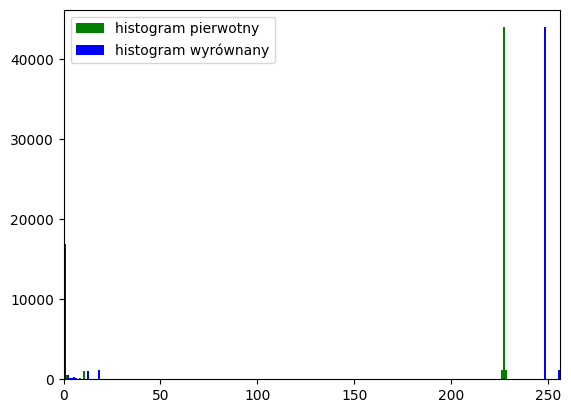

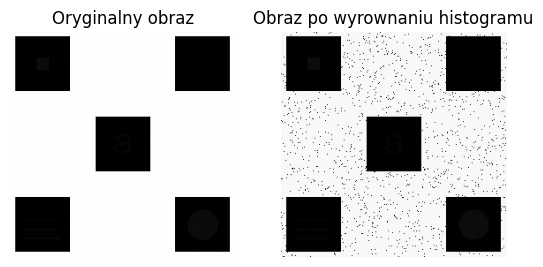

In [2]:
wyrownaj_histogram(image_path)

Celem poprawienia działania podjęto próbę lokalnego wyrównania histogramu. Aby zwizualizować efekty tego podejścia wykorzystano funkcję [***lokalne_wyrownanie_histogramu***](functions.ipynb), która korzysta z metody ***equalize*** z biblioteki ***skimage***
<br>
Metoda lokalnego wyrównywania histogramu korzysta z masek, które pozwalają podzielić obraz na kwadratowe podobrazy o jednakowej wielkości i wyrównać histogramy dla każdego z nich. Poprawiane są zatem parametry niewielkich sąsiedztw, co pozwala na ogólne polepszenie obrazu.

interactive(children=(Text(value='../data/hidden-symbols.tif', description='image_path'), IntSlider(value=3, d…

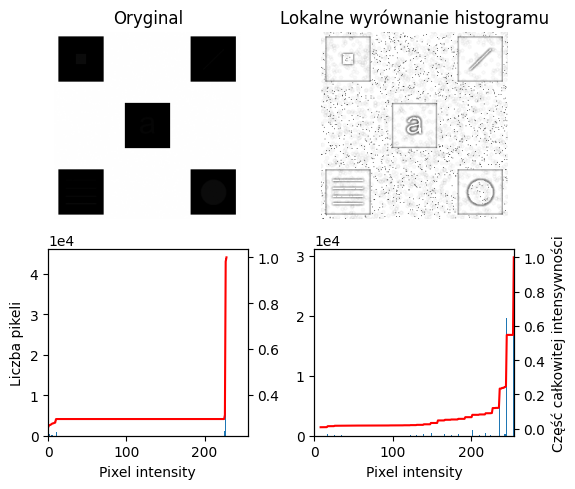

In [3]:
size= widgets.IntSlider(value=3, step=2, min=3, max=100, description="Wielkość sąsiedztwa")
interact(lokalne_wyrownanie_histogramu,image_path=image_path, size=size)
lokalne_wyrownanie_histogramu(image_path=image_path, size=3)

Jak można zaobserwować, użycie metody lokalnego wyrównywania pozwala uwypuklić niewidoczne dotąd figury, jednak jest także związane z nałożeniem szumu na obraz.

Poniższy przykład ilustruje wykorzystanie lokalnych statystyk do poprawy jakości. Funkcja ***lokalne_statystyki_poprawa_jakosc()*** została zaimplementowana w pliku **functions.ipynb**. Oblicza ona lokalną średnią i wariancję przy wykorzystaniu maski o rozmiarze podawanym jako jeden z parametrów funkcji. Pozostałe parametry to k0,k1,k2,k3 i C, które zostały przedstawione w wykładzie ***Transformacje poziomu jasności*** (strona 108)

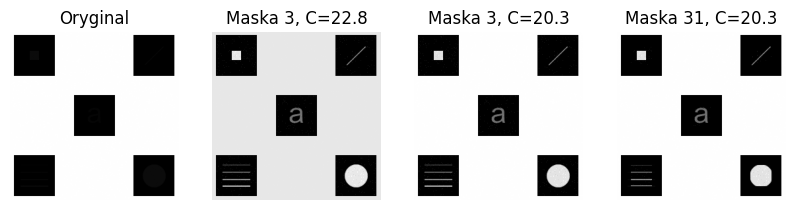

In [5]:
new_image=lokalne_statystyki_poprawa_jakosci(image_path, 3,0,0.1,0,0.1,22.8)
image=Image.open(image_path)
new_image2=lokalne_statystyki_poprawa_jakosci(image_path, 3,0,0.1,0,0.1,20.3)
new_image3=lokalne_statystyki_poprawa_jakosci(image_path, 31,0,0.1,0,0.1,20.3)
images=[image, new_image, new_image2,new_image3]
labels=['Oryginal','Maska 3, C=22.8', 'Maska 3, C=20.3','Maska 31, C=20.3']
show_multi_side_by_side(images,labels)

Jak można zaobserwować, wykorzystanie lokalnych statystyk do poprawy jakości pozwoliło nie tylko na uwydatnienie ukrytych kształtów (efekt ten został osiągnięty już w metodzie lokalnych histogramów), ale również na redukcję szumu "sól-pieprz"